In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Detecção de pele com faixa de pexels definidas

In [5]:
def deteccaoPeleFaixa(img, peleMin, peleMax):
    # Convertendo imagem para HSV
#     imagemConvertida = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imagemConvertida = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)

    # aplica os niveis minimo e maximo de cor definido
    peleMascara = cv2.inRange(imagemConvertida, peleMin, peleMax)

    # aplicando erosão e dilatação na mascara, usando kernel elíptico
    # para melhor desempenho na aplicação da mascara na pele
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
    peleMascara = cv2.erode(peleMascara, kernel, iterations = 2)
    peleMascara = cv2.dilate(peleMascara, kernel, iterations = 2)

    # Aplicando o filtro blur para tirar o ruido da mascara
    peleMascara = cv2.GaussianBlur(peleMascara, (3, 3), 0)
    
    # aplicando a mascara na imagem para pegar somente a zona de interesse
    pele = cv2.bitwise_and(img, img, mask = peleMascara)
    
    # convertendo imagem e resultado para rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pele = cv2.cvtColor(pele, cv2.COLOR_BGR2RGB)
    
    #mostando os resultados
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 10))
    ax[0].imshow(img)
    ax[1].imshow(peleMascara)
    ax[2].imshow(pele)
    
    return fig

### Lendo imagem

In [9]:
img1 = cv2.imread('paolla.jpg')
img2 = cv2.imread('img2.png')
img3 = cv2.imread('img3.jpg')

### Aplicando a função de detecção de pele com HSV

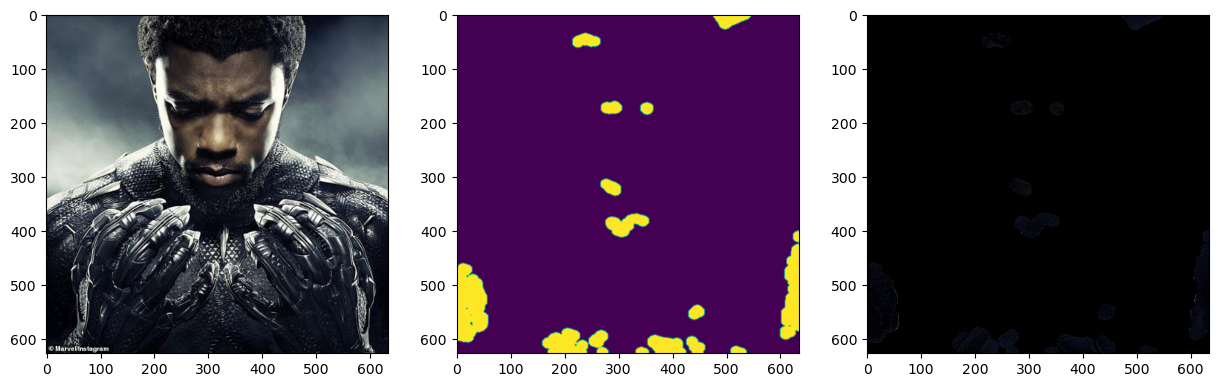

In [10]:
peleMin = np.array([0, 48, 80], dtype='uint8')
peleMax = np.array([20, 255, 255], dtype='uint8')

# aplicando função de detecçao de pele
deteccaoPeleFaixa(img=img3, peleMin= peleMin, peleMax= peleMax)

### Aplicando a função de detecção de pele com YCrCb

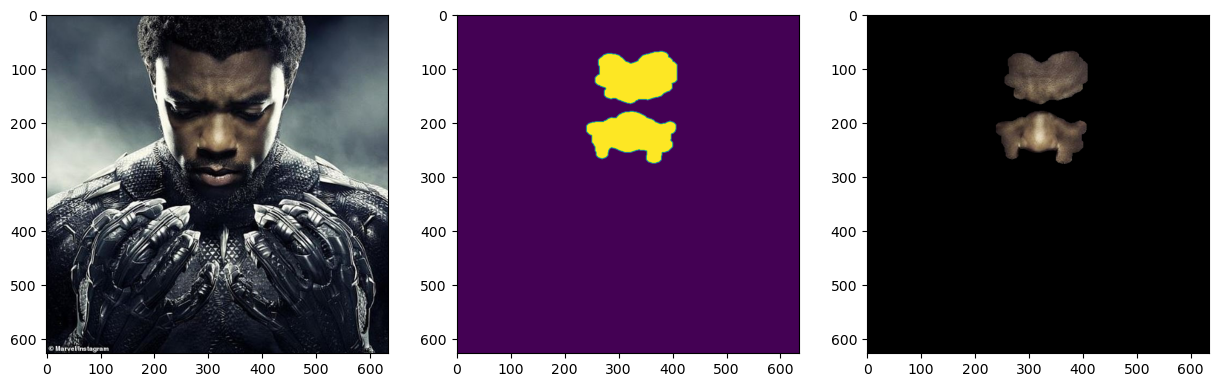

In [11]:
min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)

# aplicando função de detecçao de pele
deteccaoPeleFaixa(img=img3, peleMin= min_YCrCb, peleMax= max_YCrCb)